## pandasプロット(鋭意制作中)


In [2]:
# python用のパッケージ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# jupyter用のdisplayメソッド
from IPython.display import display, Latex, HTML, Math, JSON

In [3]:
# 9章のデータをRからJSON形式に変換
d = pd.read_json('''
[{"x":3,"y":5},{"x":3.2105,"y":3},{"x":3.4211,"y":6},{"x":3.6316,"y":7},{"x":3.8421,"y":7},
    {"x":4.0526,"y":5},{"x":4.2632,"y":9},{"x":4.4737,"y":9},{"x":4.6842,"y":7},{"x":4.8947,"y":10},
    {"x":5.1053,"y":12},{"x":5.3158,"y":8},{"x":5.5263,"y":7},{"x":5.7368,"y":4},{"x":5.9474,"y":4},
    {"x":6.1579,"y":11},{"x":6.3684,"y":9},{"x":6.5789,"y":9},{"x":6.7895,"y":8},{"x":7,"y":6}]
''')

In [4]:
d.describe()

,x,y
count,20.000000,20.000000
mean,5.000000,7.300000
std,1.245486,2.408319
min,3.000000,3.000000
25%,3.999975,5.750000
50%,5.000000,7.000000
75%,6.000025,9.000000
max,7.000000,12.000000


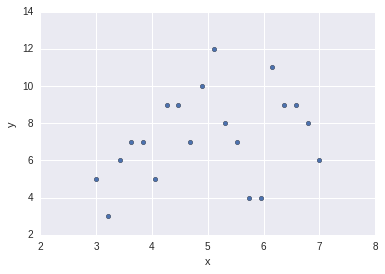

In [28]:
d.plot.scatter(x='x', y='y')
plt.show()

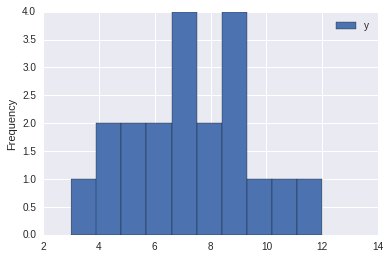

In [27]:
d.plot.hist(x='x', y='y')
plt.show()

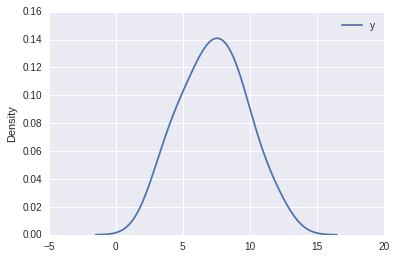

In [38]:
d.plot.kde(x='x', y='y')
plt.show()

In [19]:
# yの値は0以上の離散値で、yの平均と分散がほぼ等しい(オーダー的に)
print d.y.mean(), d.y.var()

7.3 5.8


In [21]:
# statsmodelsを使ってglmを計算します
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats.stats import pearsonr

In [23]:
fit = smf.glm('y ~ x', data=d, family=sm.families.Poisson(link=sm.families.links.log)).fit()
fit.params

Intercept    1.566046
x            0.083343
dtype: float64

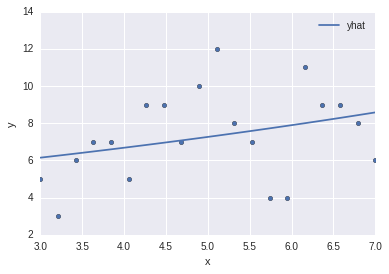

In [29]:
# λの予測値nuをyhatにセット
d['yhat'] = fit.predict()
ax = d.plot(x='x', y='yhat')
d.plot.scatter(x='x', y='y', ax=ax)
plt.show()

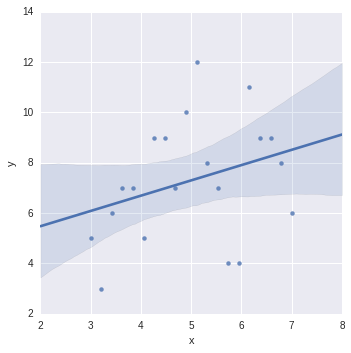

In [35]:
# seabornの線形回帰機能を使って、入力データのプロット（lmplot）
sns.lmplot(x='x', y='y', data=d)
plt.show()